Essentials imports.

In [71]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

Taking a glance at the data.

In [72]:
labels = pd.read_csv("datasets/bee_data.csv", index_col=0)

labels.head()

,date,time,location,zip code,subspecies,health,pollen_carrying,caste
file,,,,,,,,
041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


Create a function to convert image in to numpy array.

In [73]:
def get_image(image_id, root="datasets/bee_imgs/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = image_id
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

Plotting the image.

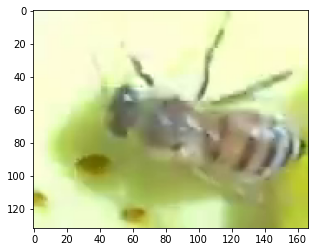

In [74]:
plt.imshow(get_image("041_073.png"))
plt.show()


List Unique subspecies of the bees.

In [75]:
labels.subspecies.unique()

array(['-1', 'Italian honey bee', 'VSH Italian honey bee',
       'Carniolan honey bee', 'Russian honey bee',
       '1 Mixed local stock 2', 'Western honey bee'], dtype=object)

Remove file as the index using reset_index() method.

In [76]:
labels = labels.reset_index()

In [77]:
labels.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


Create a function to display image and return the subspecies of the bee in the image.

In [78]:
def show_image(index):
    """
    Displays an image from the dataset with respect to the given index and returns the subspecies|.
    """
    file_name = labels[labels.index==index].file.values[0]
    subspecies = labels[labels.index==index].subspecies.values[0]
    img = get_image(file_name)
    plt.imshow(img)
    plt.show()
    return file_name, subspecies
    

Change RGB to Gray scale.

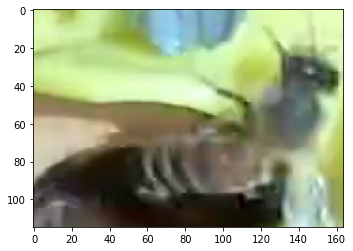

array([[[212, 241, 161],
        [215, 240, 166],
        [215, 240, 166],
        ...,
        [235, 254, 191],
        [235, 254, 191],
        [234, 255, 191]],

       [[213, 241, 164],
        [213, 241, 166],
        [213, 241, 166],
        ...,
        [235, 254, 191],
        [234, 253, 190],
        [233, 254, 190]],

       [[213, 241, 164],
        [215, 243, 168],
        [215, 243, 168],
        ...,
        [235, 254, 191],
        [234, 253, 190],
        [233, 254, 190]],

       ...,

       [[120, 115, 112],
        [133, 128, 127],
        [133, 128, 127],
        ...,
        [169, 184, 118],
        [166, 181, 115],
        [165, 180,  96]],

       [[122, 120, 116],
        [131, 129, 127],
        [132, 130, 128],
        ...,
        [174, 191, 126],
        [170, 187, 122],
        [170, 184, 105]],

       [[122, 120, 116],
        [125, 123, 121],
        [127, 125, 123],
        ...,
        [177, 194, 129],
        [173, 190, 125],
        [171, 185, 106]]

In [79]:
file_name, _ = show_image(0)
image = get_image(file_name)

image

In [80]:
grey_image = rgb2gray(image)

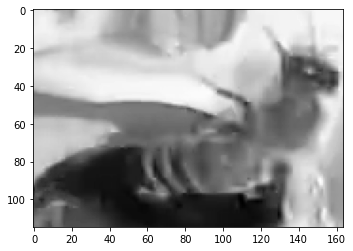

In [81]:
plt.imshow(grey_image, cmap="gray")

The images are converted into a format that a machine learning algorithm can understand.

An image is divided in a grid fashion into cells, and for the pixels within each cell, a histogram of gradient directions is compiled. To improve invariance to highlights and shadows in an image, cells are block normalized, meaning an intensity value is calculated for a larger region of an image called a block and used to contrast normalize all cell-level histograms within each block. The HOG feature vector for the image is the concatenation of these cell-level histograms.

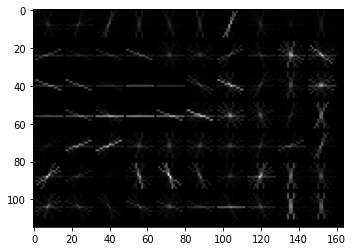

In [82]:
hog_features, hog_image = hog(grey_image,
                                visualize=True,
                                block_norm='L2-Hys',
                                pixels_per_cell=(16, 16),
)
plt.imshow(hog_image, cmap="gray")

A function called create_features that combines these two sets of features by flattening the three-dimensional array into a one-dimensional (flat) array.

In [85]:
def create_features(img):
    #flattern theree channel color image
    color_features = img.flatten()
    #convert image to greyscale
    grey_image = rgb2gray(img)
    #calculate hog features
    hog_features = hog(grey_image,block_norm='L2-Hys',
                        pixels_per_cell=(16,16)
                    )
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

In [86]:
bee_features = create_features(image)

In [87]:
print(bee_features)

[2.12000000e+02 2.41000000e+02 1.61000000e+02 ... 8.01150283e-02
 1.15160647e-01 2.33536443e-01]


Above we generated a flattened features array for the bombus image. Now it’s time to loop over all of our images. We will create features for each image and then stack the flattened features arrays into a big matrix we can pass into our model.

In [89]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.file.values:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix

feature_matrix = create_feature_matrix(labels)

ValueError: negative dimensions are not allowed